<br />
<center><font size='6px' color='#87CEEB '><b>TP n°2 : Segmentation d'une image</b></font>
<br />
</center>

<center> <font size='6px' color='#d05c9d  '>Ghada Hirch</font>
<br />
</center>

<h2><font color='#b666d2 '>I - L'algorithme de K-means : Clustering</font></h2>

In [1]:
!pip install opencv-python

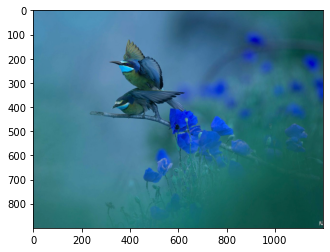

In [6]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
from matplotlib import pyplot as plt

image = cv2.imread('bird.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('bird4.jpg', quant)
plt.imshow(image)

cv2.imread('bird.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.show()

<h2><font color='#b666d2 '>II - L'application de différents mode de bruit sur une image</font></h2>

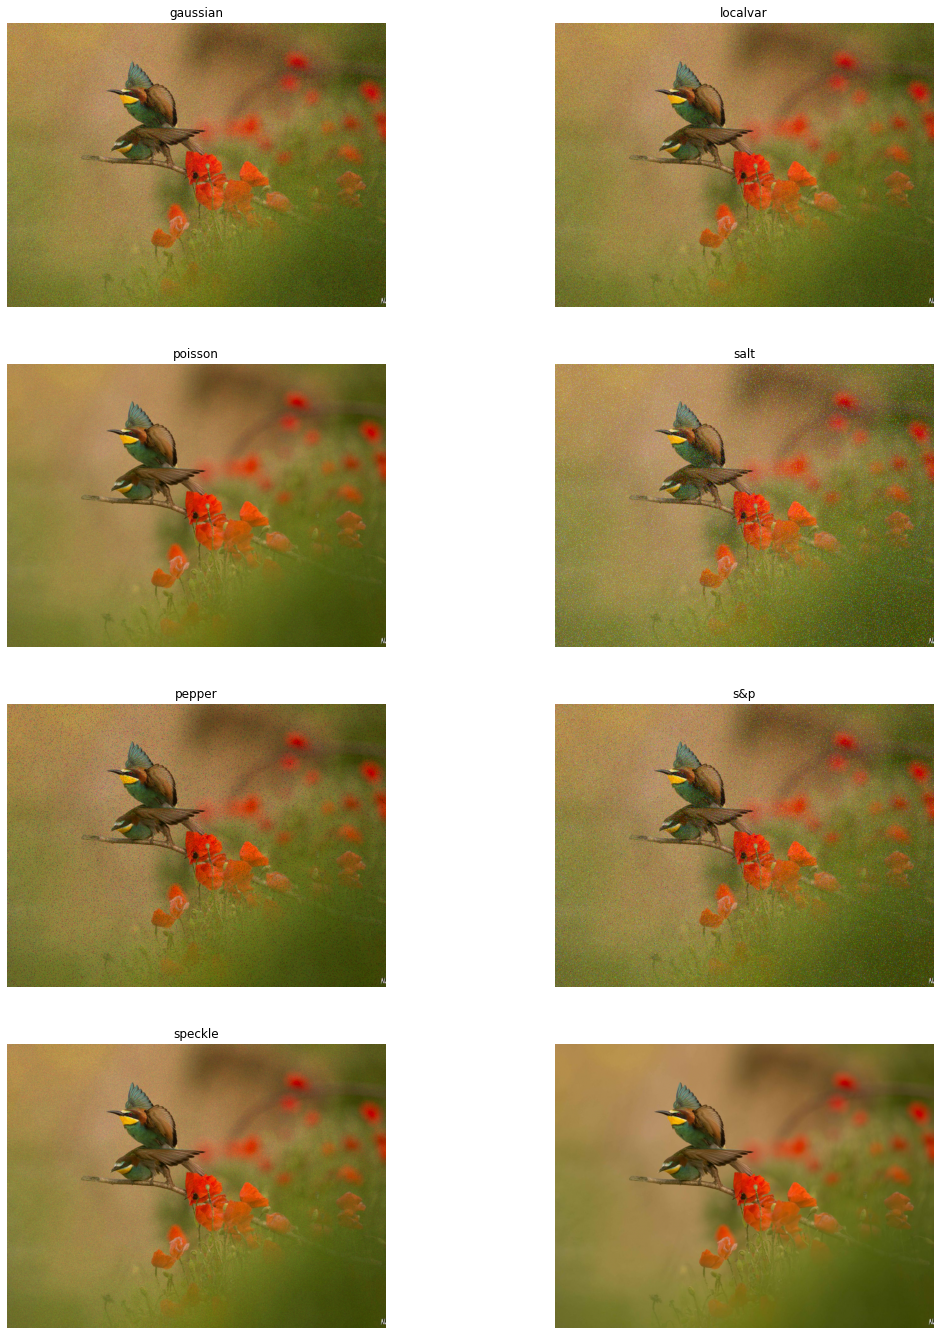

In [7]:
import skimage.io
import matplotlib.pyplot as plt
img_path="bird.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

<h2><font color='#b666d2  '>III - Le débruitage: denoise_tv_chambolle</font></h2>

<p><font color='#b666d2  '>Denoising of an image refers to the process of reconstruction of a signal from noisy images. Denoising is done to remove unwanted noise from image to analyze it in better form. It refers to one of the major pre-processing steps.</font></p>

(<matplotlib.axes._subplots.AxesSubplot at 0x24dda3e9b50>,
 <matplotlib.image.AxesImage at 0x24dda415c10>)

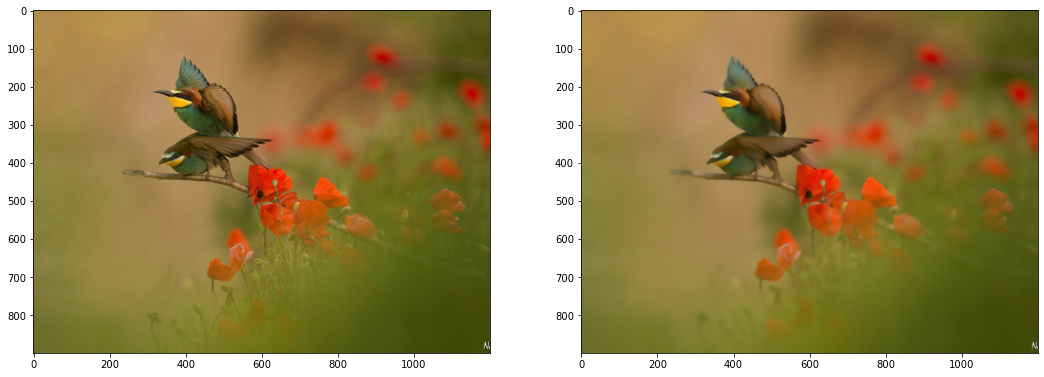

In [8]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
# Apply total variation filter denoising
img_path="bird.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "Pepper", r,c,1)
denoised_image = denoise_tv_chambolle(img,weight=0.1,multichannel=True)
# Show denoised image
plt.subplot(121), plt.imshow(img) 
plt.subplot(122), plt.imshow(denoised_image) 
